## Probability and Distributions

In [42]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H T H T T T H H T T T T T T H T T H T T T H H H H T T T H H T H H T T T T T T T
Number of Heads: 14
p1 = Number of Heads/Total Throws: 0.35


In [3]:
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p2 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T T T H T H H T T T T T T T T T T H H T H T H T T H T T H T H T H H H T H H T T
Number of Heads: 15
p2 = Number of Heads/Total Throws: 0.375


In [4]:
throws=throw_a_coin(10000)
print ("First 1000 Throws:"," ".join(throws)[:1000])
print ("Number of Heads:", np.sum(throws=='H'))
print ("p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.)

First 1000 Throws: H T H T T H T H H T T T H T T T H H T T T T T H H H T T H T H T T H H T T H H H H H H H T H T T T H T H H T H T T T H T T T T T T H H T T T T H H T H T H H H T T H H H H T H T H H H T T T H H H T T T H T H H H H H H T T H T T H H T H H T T T T T H T T H H T H T H H H T H T T T H T T T T H H T T T H H T T H T H H H H H T T H T T T H T T H T T T H T T T T H H T H T T T H T H H T H H H H H H H H H T T T H H H H T T H T T T T T H H T T H T H T H T H H T T H T T T H T T H T T T T H H T T T H H H H H H T H T T H H H H H H T T H T H H T T H T H T T T T T H T T T H T H T H H H H T T H H H H H H H T H T H H T H T T H T T H T H H T T H T T H T H T H H H T T T H H T H H T T H T H T H H T T T H T H T T T T H T T H T H T H T H H T H H T T T H T H T H H H H T T H T H T T H H H T H H T H H H T T H H T T T T T H H H T H H H T H H H T H H T T T T T T T T H H H T T H T T T H H T H T T T T T H T H H T H T H H H H T T H T T H T H H H H H H T T H T H T T H H T T T T H T T T H H H H T T H

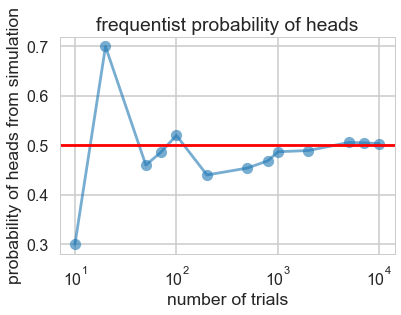

In [5]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

### A simple Election Model
In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [6]:
predictwise = pd.read_csv('data\predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


#### Simulating the model
To do this, we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function simulate_election that uses this predictive model to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this n_sim times and return a list of total Obama electoral votes in each simulation.

In [7]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    #reshape transform array's dimensions so you can compare both, -1 is use to let python decide the size necessary \
    #to fit all the values
    return obama_votes.sum(axis=0)

In [8]:
result = simulate_election(predictwise, 10000)
print ((result >= 269).sum())

9951


#### Displaying the prediction
Now, lets visualize the simulation. We will build a histogram from the result of simulate_election. We will normalize the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie.

We also display the probability of an Obama victory

In [9]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

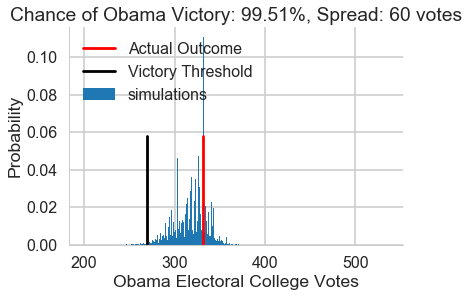

In [10]:
plot_simulation(result)

### Bernoulli Random Variables (in scipy.stats)
Let us engage in some term defining right now. $X$ is a random variable, and when we say $X=x$ we are asking "what if the random variable X takes the value x. $P(X=x)$ asks: what is the probability that the random variable X takes the value x. Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [11]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

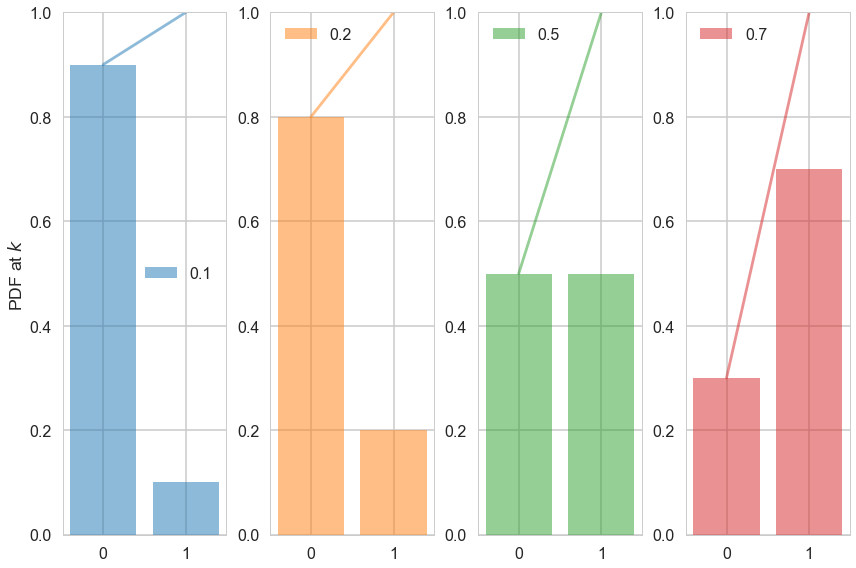

In [12]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()


### Uniform Distribution (in numpy)

### Empirical Distribution
**Cumulative Distribution Function**, or CDF (sometimes just called the distribution, as opposed to the density).

In [13]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print ("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1483
Obama Win CDF at votes= 320  is  0.4494
Obama Win CDF at votes= 340  is  0.8478
Obama Win CDF at votes= 360  is  0.998
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


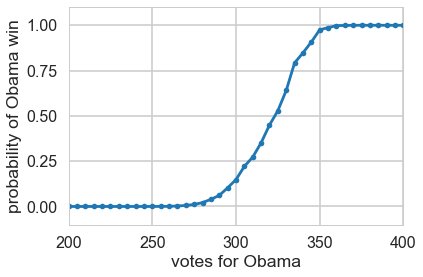

In [14]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

### Binomial Distribution (in scipy.stats)

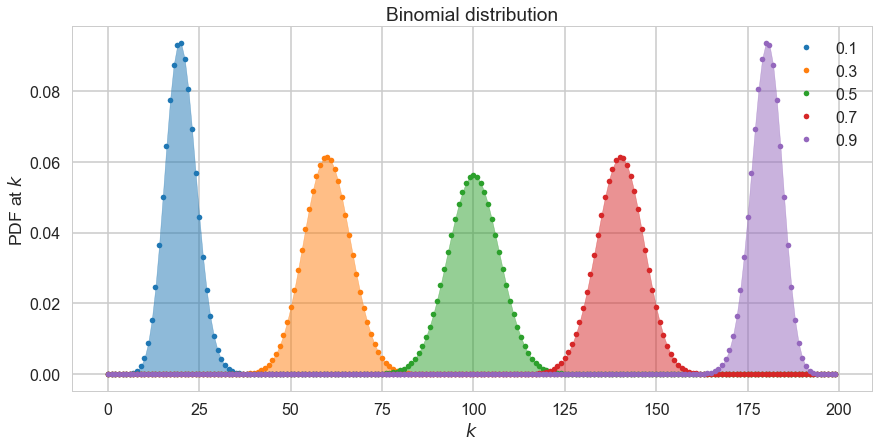

In [15]:
from scipy.stats import binom
#Probability of getting k succesful results when doing n events
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

#### The various ways to get random numbers
1. np.random.choice chooses items randomly from an array, with or without replacement
2. np.random.random gives us uniform randoms on [0.0,1.0)
3. np.random.randint gives us random integers in some range
4. np.random.randn gives us random samples from a Normal distribution, which we talk about later.
5. scipy.stats.distrib gives us stuff from a distribution. Here distrib could be binom for example, as above. distrib.pdf or distrib.pmf give us the density or mass function, while cdf gives us the cumulaive distribution function. Just using distrib as a function with its params creates a random variable generating object, from which random variables can be generated in the form distrib(params).rvs(size).

## Frequentism, Samples, and the Bootstrap.
### DATA AND MODELS

In [16]:
df = pd.read_table("data/babyboom.dat.txt", header=None, sep='\s+', 
                   names=['24hrtime','sex','weight','minutes'])
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [17]:
df.minutes.mean()

788.7272727272727

In [18]:
df.corr()

,24hrtime,sex,weight,minutes
24hrtime,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minutes,0.999840,0.031815,0.079616,1.000000


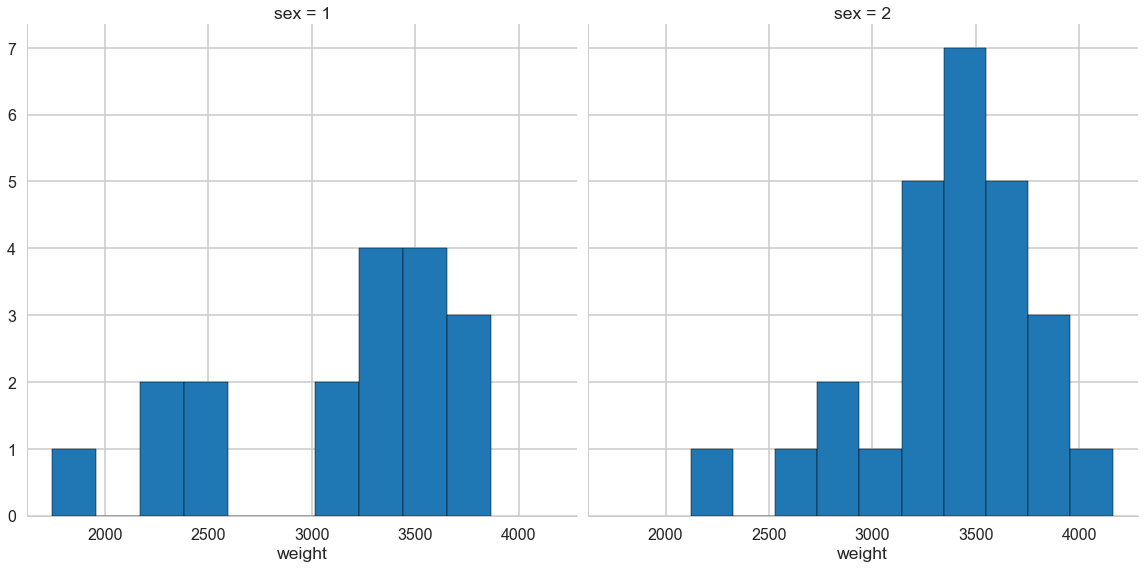

In [19]:
g = sns.FacetGrid(col="sex", data=df, size=8)
g.map(plt.hist, "weight", ec='black')

### Choosing a model
Let us characterize our particular sample statistically then, using a probability distribution

#### The Exponential Distribution
The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.

Text(0,0.5,'exponential pdf')

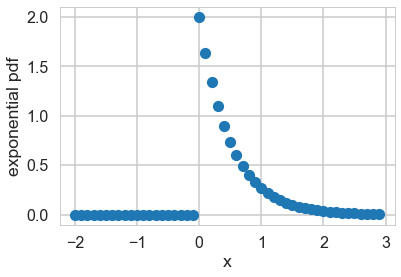

In [20]:
f = lambda x, l: l*np.exp(-l*x)*(x>0) #Use to apply the function only to x>0
xpts=np.arange(-2,3,0.1)
plt.plot(xpts,f(xpts, 2),'o');
plt.xlabel("x")
plt.ylabel("exponential pdf")

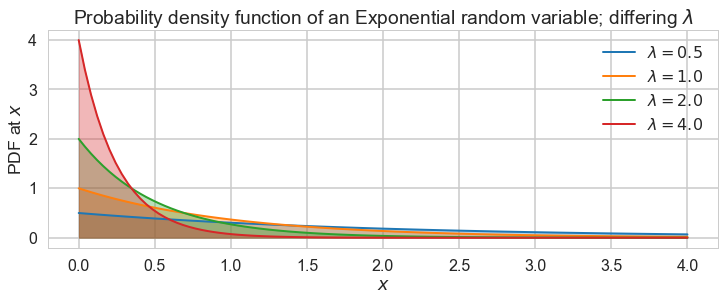

In [21]:
from scipy.stats import expon

x = np.linspace(0,4, 100)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

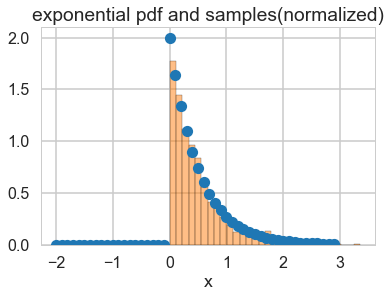

In [22]:
plt.plot(xpts,expon.pdf(xpts, scale=1./2.),'o')
plt.hist(expon.rvs(size=1000, scale=1./2.), normed=True, alpha=0.5, bins=30, ec='black');
plt.xlabel("x")
plt.title("exponential pdf and samples(normalized)");

In scipy.stats, you can alternatively create a **frozen object**, which holds values of things like the scale

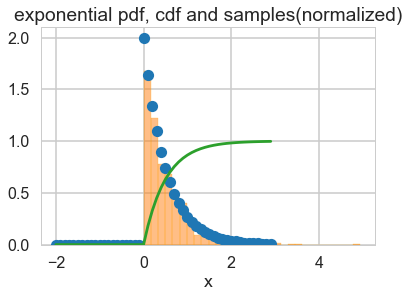

In [23]:
rv = expon(scale=0.5) #frozen with lambda = 0.5
plt.plot(xpts,rv.pdf(xpts),'o')
plt.hist(rv.rvs(size=1000), normed=True, alpha=0.5, bins=30, ec='orange');
plt.plot(xpts, rv.cdf(xpts));
plt.xlabel("x")
plt.title("exponential pdf, cdf and samples(normalized)");

### Understanding our data using a distribution
Lets play with our data a bit to understand it:

The first birth occurred at 0005, and the last birth in the 24-hour period at 2355. Thus the 43 inter-birth times happened over a 1430-minute period, giving a theoretical mean of 1430/43 = 33.26 minutes between births.

Lets plot a histogram of the inter-birth times

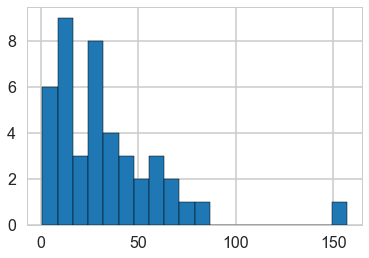

In [24]:
timediffs = df.minutes.diff()[1:]
timediffs.hist(bins=20, ec='black');

In [25]:
lambda_from_mean = 1./timediffs.mean()
print (lambda_from_mean, 1./lambda_from_mean)

0.03006993006993007 33.25581395348837


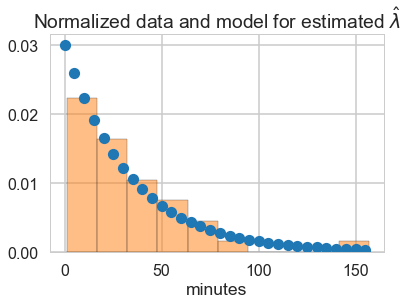

In [26]:
minutes=np.arange(0, 160, 5)
rv = expon(scale=1./lambda_from_mean)
plt.plot(minutes,rv.pdf(minutes),'o')
timediffs.hist(normed=True, alpha=0.5,ec='black');
plt.xlabel("minutes");
plt.title("Normalized data and model for estimated $\hat{\lambda}$");

#### An aside: The Poisson Distribution

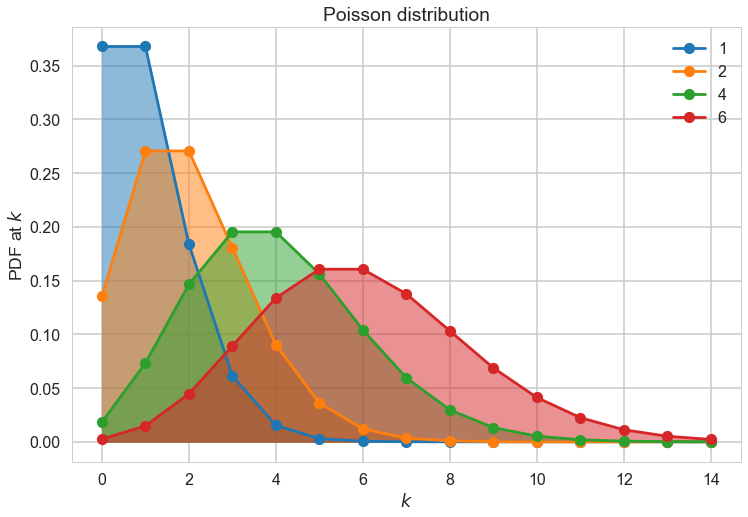

In [27]:
from scipy.stats import poisson
k = np.arange(15)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$");

In [28]:
per_hour = df.minutes // 60
num_births_per_hour=df.groupby(per_hour).minutes.count()
num_births_per_hour

minutes
0     1
1     3
2     1
4     4
7     2
8     2
9     1
10    3
11    1
12    2
13    1
14    4
15    1
16    2
17    1
18    3
19    4
20    3
21    2
22    1
23    2
Name: minutes, dtype: int64

In [29]:
num_births_per_hour.mean()

2.0952380952380953

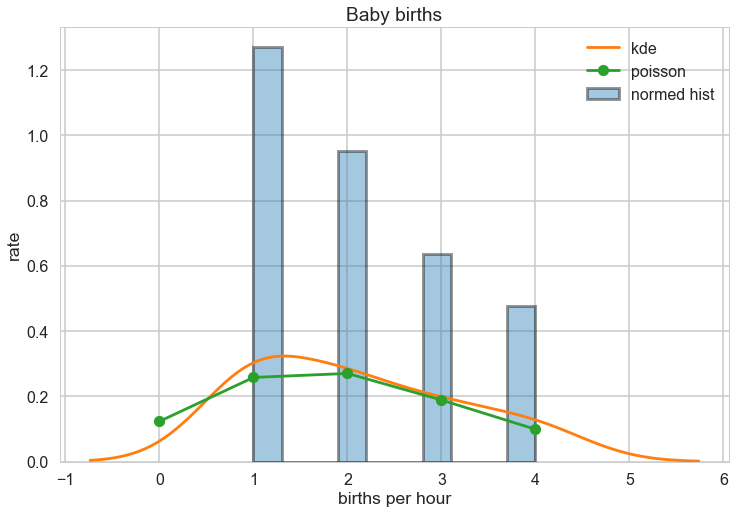

In [33]:
k = np.arange(5)
plt.figure(figsize=(12,8))
tcount=num_births_per_hour.sum()
plt.hist(num_births_per_hour, alpha=0.4,  lw=3, normed=True, label="normed hist", ec='black')
sns.kdeplot(num_births_per_hour, label="kde")
plt.plot(k, poisson.pmf(k, num_births_per_hour.mean()), '-o',label="poisson")
plt.title("Baby births")
plt.xlabel("births per hour")
plt.ylabel("rate")
plt.legend();

### FREQUENTIST STATISTICS
In frequentist statistics, the data we have in hand, is viewed as a sample from a population. So if we want to estimate some parameter of the population, like say the mean, we estimate it on the sample.

This is because we've been given only one sample. Ideally we'd want to see the population, but we have no such luck.

The parameter estimate is computed by applying an estimator $F$ to some data $D$, so est${\lambda} = F(D)$.

**The parameter is viewed as fixed and the data as random, which is the exact opposite of the Bayesian approach which you will learn later in this class.**

For the babies, lets assume that an exponential distribution is a good description of the baby arrival process. Then we consider some larger population of babies from which this sample is drawn, there is some true $trueval{\lambda}$ which defines it. We dont know this. The best we can do to start with is to estimate a lambda from the data set we have, which we denote $est{\lambda}$.

Now, imagine that I let you peek at the entire population in this way: I gave you some M data sets drawn from the population, and you can now find the mean on each such dataset, of which the one we have here is one. So, we'd have M means. You can think of these means as coming from some fixed parameter by some data drawing process

Now if we had many replications of this data set: that is, data from other days, an ensemble of data sets, for example, we can compute other $\est{\lambda}$, and begin to construct the sampling distribution of $\lambda$.

#### Segue: many samples on the binomial

In [34]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [35]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [36]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [37]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

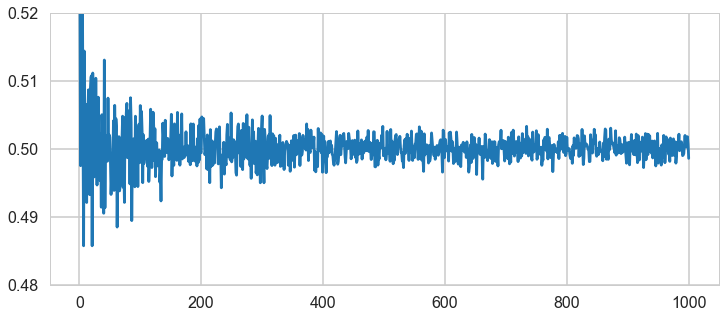

In [40]:
plt.figure(figsize=(12,5))
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

#### The notion of a Sampling Distribution
In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a sampling distribution.

Since, in the real world, we see only one sample, this distribution helps us do inference, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the sampling distribution of the mean, or the distribution of sample means.

So, in the babies case, the uncertainty in the parameter estimate can be measured by computing the sampling distribution of the estimator. What you are doing is sampling many Data Sets $D_i$ from the true population (which we are not given you will argue, and you are right, but just wait a bit), say M of them, each of size N, from some true model $p(\cdot|trueval{\lambda})$. We will now calculate M $est{\lambda}_i$, one for each dataset. As we let $M \rightarrow \infty$, the distribution induced on $est{\lambda}$ is the sampling distribution of the estimator.

### Inference
Just having an estimate is no good. We will want to put confidence intervals on the estimation of the parameters. This presents a conundrum: we have access to only one sample, but want to compute a error estimate over multiple samples, using an estimator such as the standard deviation.
In the last two decades, resampling the ONE dataset we have has become computationally feasible. Resampling involves making new samples from the observations, each of which is analysed in the same way as out original dataset. One way to do this is the Bootstrap.
### Bootstrap
Bootstrap tries to approximate our sampling distribution. If we knew the true parameters of the population, we could generate M fake datasets. Then we could compute the parameter (or another estimator) on each one of these, to get a empirical sampling distribution of the parameter or estimator, and which will give us an idea of how typical our sample is, and thus, how good our parameter estimations from our sample are. (again from murphy)

But we dont have the true parameter. So we generate these samples, using the parameter we calculated. Or, alteratively, we sample with replacement the X from our original sample D, generating many fake datasets, and then compute the distribution on the parameters as before.

We do it here for the mean of the time differences. We could also do it for its inverse, $\lambda$.

#### Non Parametric bootstrap
Resample the data! We can then plot the distribution of the mean time-difference.

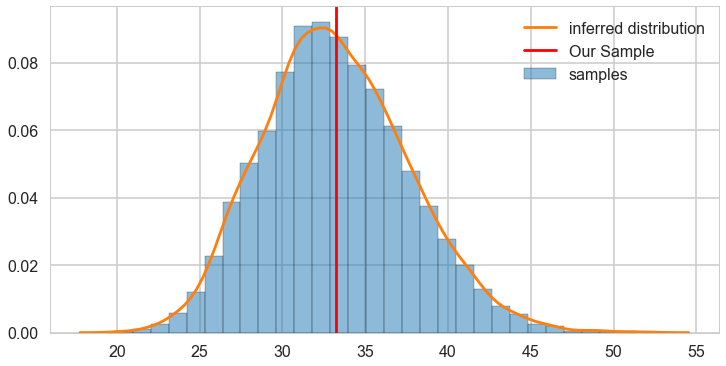

In [49]:
M_samples=10000
N_points = timediffs.shape[0]
bs_np = np.random.choice(timediffs, size=(M_samples, N_points))
sd_mean=np.mean(bs_np, axis=1)
sd_std=np.std(bs_np, axis=1)
plt.hist(sd_mean, bins=30, normed=True, alpha=0.5,label="samples", ec='black');
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(timediffs.mean(), 0, 1, color='r', label='Our Sample')
plt.legend()

#### Parametric Bootstrap
And here we do it in a parametric way. We get an "estimate" of the parameter from our sample, and them use the exponential distribution to generate many datasets, and then fir the parameter on each one of those datasets. We can then plot the distribution of the mean time-difference.

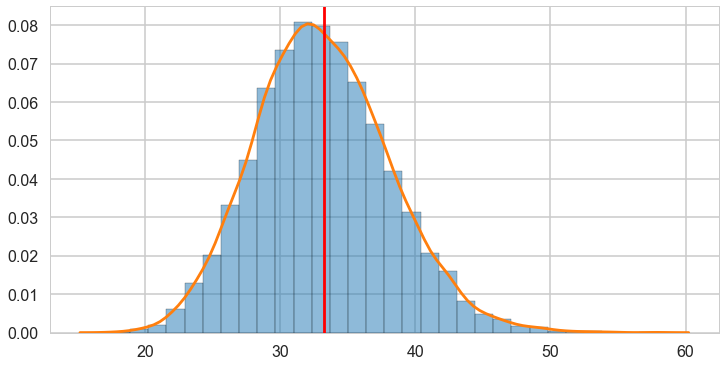

In [51]:
rv = expon(scale=1./lambda_from_mean)
M_samples=10000
N_points = timediffs.shape[0]
bs_p = rv.rvs(size=(M_samples, N_points))
sd_mean_p=np.mean(bs_p, axis=1)
sd_std_p=np.std(bs_p, axis=1)
plt.hist(sd_mean_p, bins=30, normed=True, alpha=0.5, ec='black');
sns.kdeplot(sd_mean_p);
plt.axvline(timediffs.mean(), 0, 1, color='r', label='Our Sample')